In [1]:
# Load in necessary packages

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(".././Data/processed/movies_model.csv")

### Gross Revenue over Time

In [2]:
fig = px.line(df.sort_values('year'), x='year', y='gross',
              title='Gross Revenue Over Time',
              markers=True)
fig.update_layout(xaxis_title='Year', yaxis_title='Gross Revenue')
fig.show()

### Budget vs Gross Scatterplot with Genre Coloring

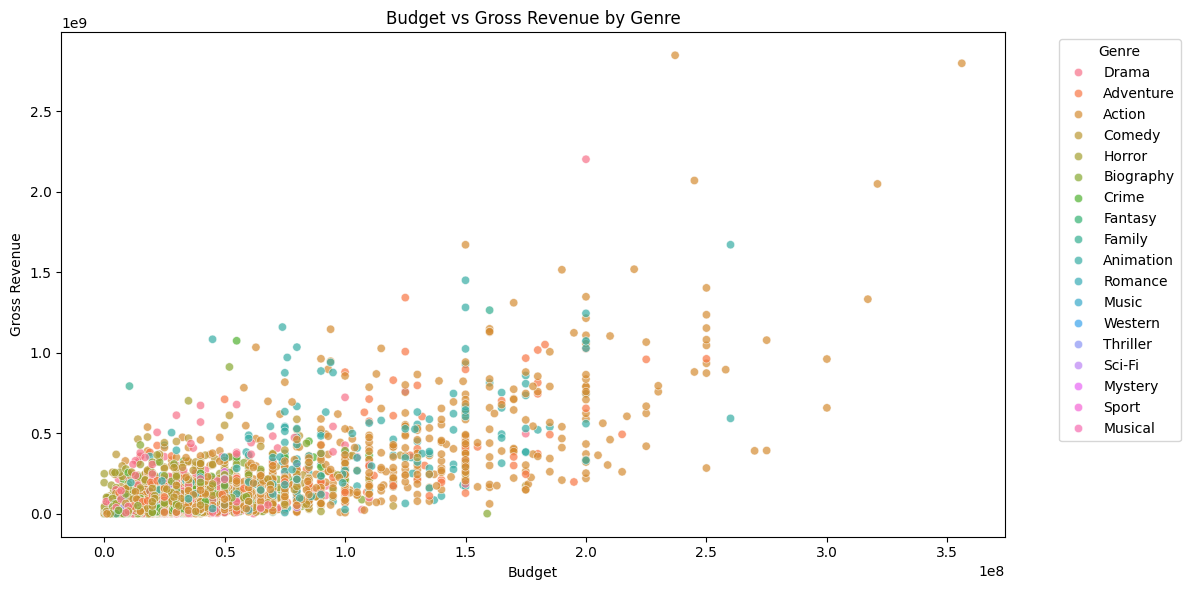

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='budget', y='gross', hue='genre', alpha=0.7)
plt.title('Budget vs Gross Revenue by Genre')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Correlation Heatmap for Numeric Features

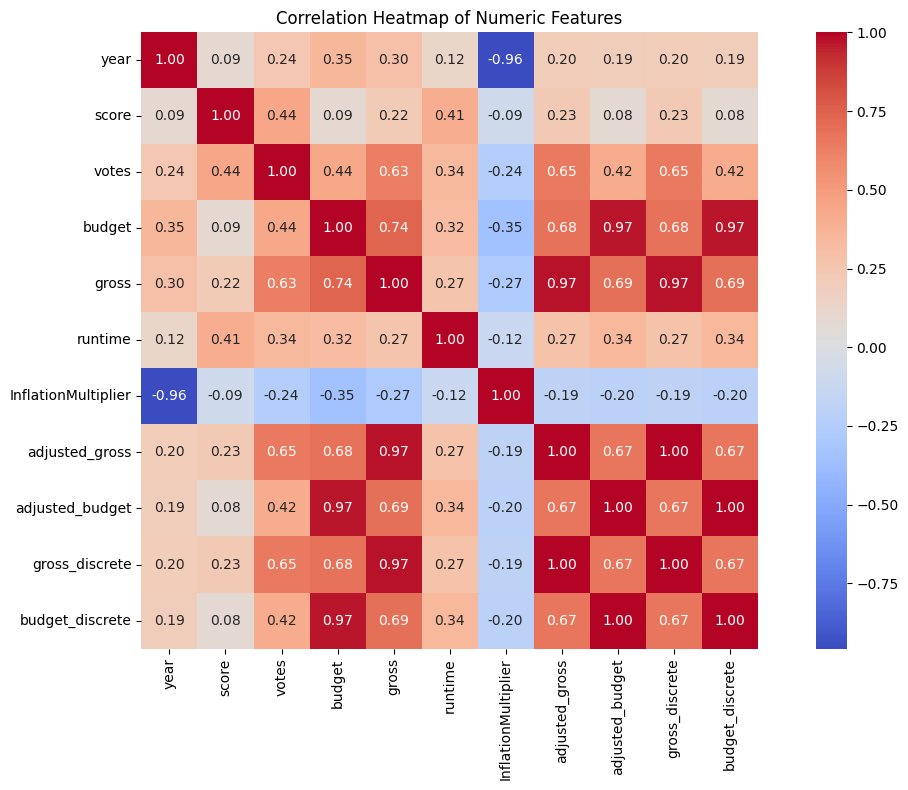

In [3]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

### Top Genres Over Decades

In [12]:
# Step 1: Group and count genres per decade
genre_counts = (
    df.groupby(['decade', 'genre'])
    .size()
    .reset_index(name='count')
)

# Step 2: Filter top genres per decade (optional: top 5 per decade)
top_genres = (
    genre_counts
    .sort_values(['decade', 'count'], ascending=[True, False])
    .groupby('decade')
    .head(5)
)

# Step 3: Plot
fig = px.bar(
    top_genres,
    x='decade',
    y='count',
    color='genre',
    barmode='group',
    title='Top Genres Over the Decades',
    labels={'count': 'Number of Movies', 'decade': 'Decade'}
)

fig.update_layout(xaxis=dict(type='category'))
fig.show()

In [13]:
fig.write_html("top_genres_decades.html")

###### I think we should consider getting rid of the NAs for this graph but I wanted to include it in this initial version for you to see they exist

### Budget vs. Gross Scatterplots by Rating

In [9]:
fig = px.scatter(
    df,
    x='adjusted_budget',
    y='adjusted_gross',
    color='rating',
    hover_data=['name', 'year', 'genre'],
    title='Budget vs Adjusted Gross by Rating',
    labels={
        'adjusted_budget': 'Adjusted Budget (USD)',
        'adjusted_gross': 'Adjusted Gross (USD)',
        'rating': 'MPAA Rating'
    }
)

fig.update_layout(template='plotly_white')
fig.show()

In [11]:
fig.write_html('budget_gross_rating.html')

###### I think we should consider reducing the number of ratings we consider to the major movie ones shown in theatres (G, PG, PG-13, R) but like the earlier one I included everything in this first draft